# CUSTOMER CHURN PREDICTION using Machine Learning

### 1. We aim to accomplish the following for this study:

Identify and visualize which factors contribute to customer churn:

Build a prediction model that will perform the following:

Classify if a customer is going to churn or not
Preferably and based on model performance, choose a model that will attach a probability to the churn to make it easier for customer service to target low hanging fruits in their efforts to preven.t churn

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [41]:
data =  pd.read_csv('Churn_Modelling.csv')

### 2. Data set review & preparation
In this section we will seek to explore the structure of our data:1. To understand the input space the data set
2. And to prepare the sets for exploratory and prediction tasks

In [42]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Here target variable i.e., Exited 1 = Customer left the bank, 0= not left

In [43]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [44]:
data.shape

(10000, 14)

The Df has 1000 rows with 14 attributes. We review this further to identify what attributes will be necessary and what data manipulation needs to be carried out before Exploratory analysis and prediction modelling

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [46]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [47]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [77]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [78]:
data =  data.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [79]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 3. Exploratory Data Analysis

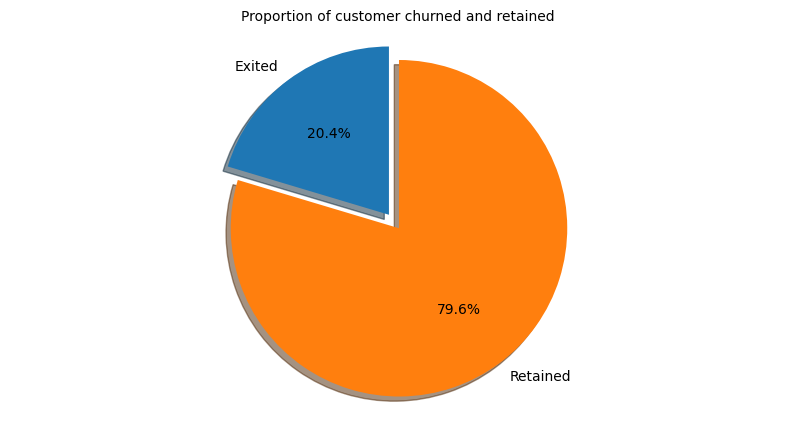

In [80]:
labels = 'Exited', 'Retained'
sizes = [data.Exited[data['Exited']==1].count(), data.Exited[data['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 10)
plt.show()

So about 20% of the customers have churned. So the baseline model could be to predict that 20% of the customers will churn. Given 20% is a small number, we need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained

<Axes: xlabel='IsActiveMember', ylabel='count'>

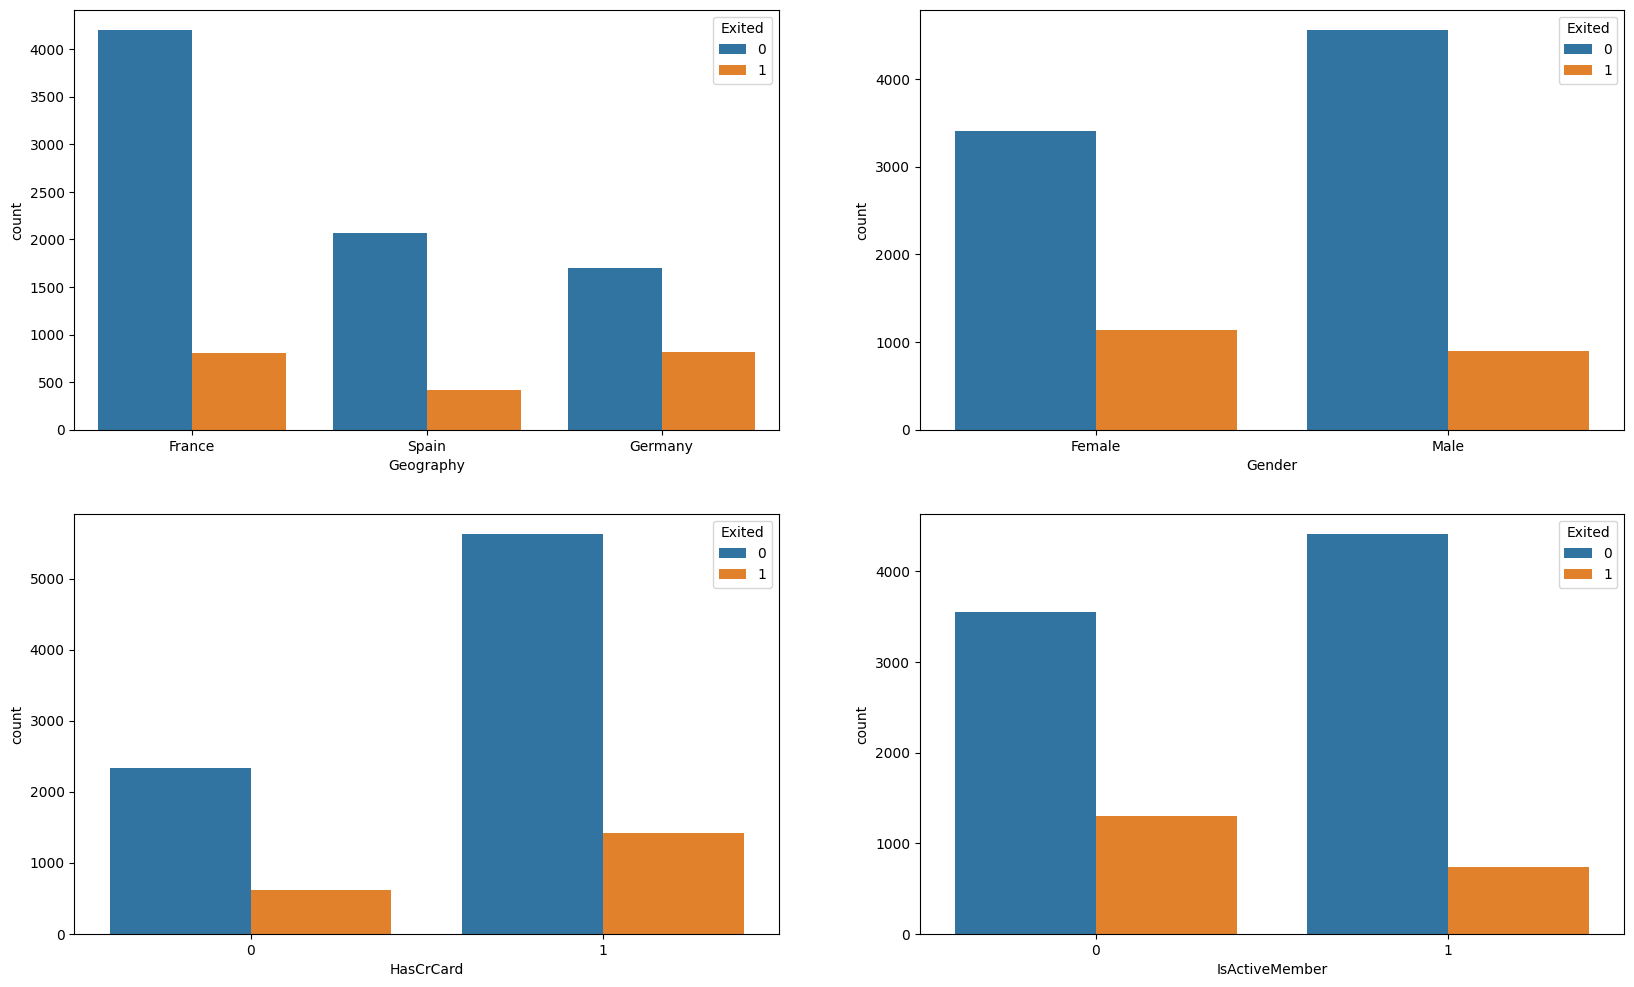

In [81]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = data, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = data, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = data, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = data, ax=axarr[1][1])

We note the following:

1. Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients

2. The proportion of female customers churning is also greater than that of male customers.
   
4. Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.
   
5. Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

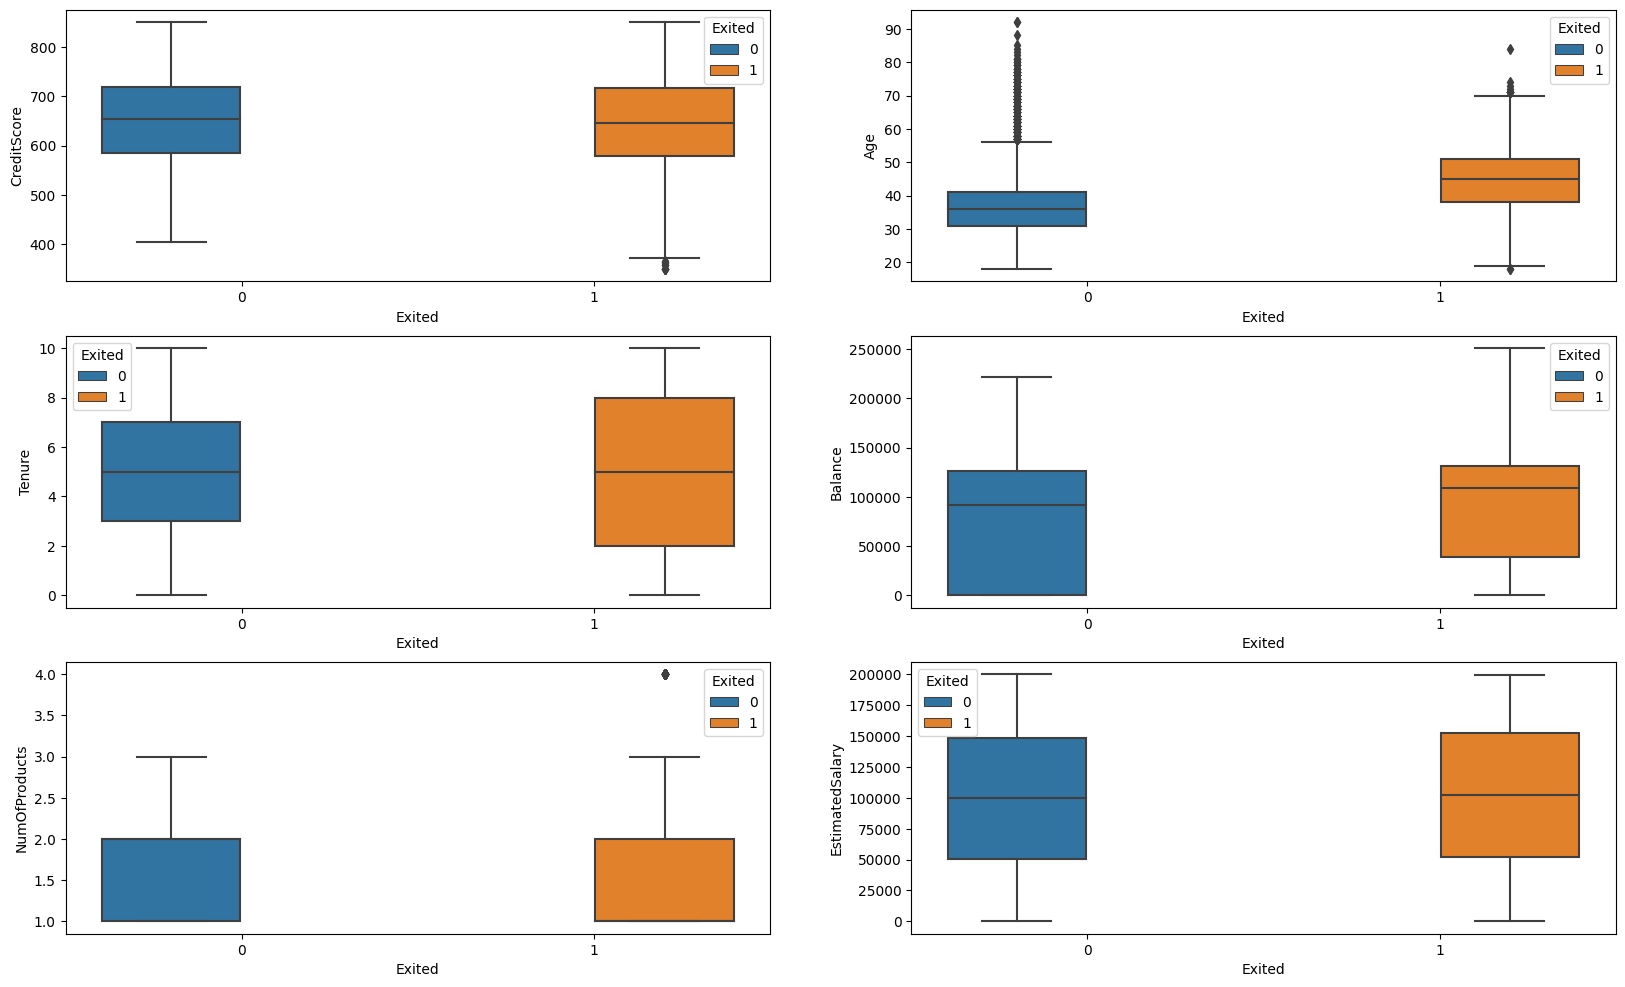

In [82]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = data, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = data , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = data, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = data, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = data, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = data, ax=axarr[2][1])

We note the following:

1. There is no significant difference in the credit score distribution between retained and churned customers.
    
2. The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups.
   
3. With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.
   
4. Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.
   
5. Neither the product nor the salary has a significant effect on the likelihood to churn.

### 4. Encoding categorical data

In [83]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [88]:
data = pd.get_dummies(data,drop_first=True)

In [89]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


### 5.  Handling Imbalanced with SMOTE

In [99]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [100]:
import seaborn as sns

<Axes: xlabel='Exited', ylabel='count'>

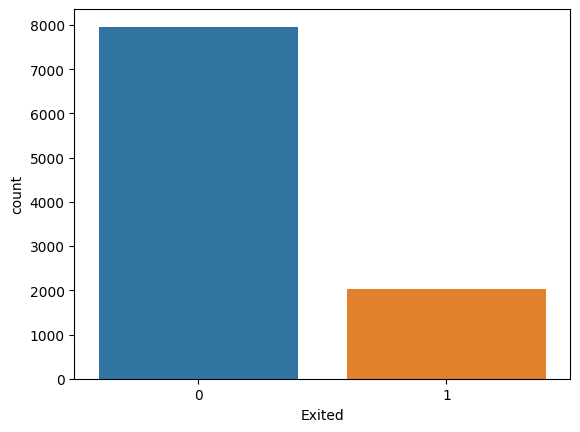

In [101]:
sns.countplot(x='Exited',data=data)

From the data we can see that our data is imbalanced i.e., target class has uneven distribution of the observation. One  class has very high no. of observation 7963 and other has very low no. of observation 2037. It is not suggested to use the accuracy score of imbalanced data.

In [112]:
X = data.drop('Exited',axis=1)
y = data['Exited']

In [113]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [114]:
from imblearn.over_sampling import SMOTE

In [115]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [116]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [117]:
X = data.drop('Exited',axis=1)

In [118]:
y = data['Exited'] 

In [182]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

### . Splitting data set into training and testing

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=42)

### 7. Feature Scaling

In [122]:
from sklearn.preprocessing import StandardScaler

In [123]:
sc = StandardScaler()

In [124]:
X_train = sc.fit_transform(X_train)

In [125]:
X_test = sc.transform(X_test)

In [126]:
X_train

array([[-0.48623191, -0.19190926,  0.81392063, ..., -0.76444755,
         1.57598535, -1.22015054],
       [ 1.10255551,  0.11101776, -1.38577152, ..., -0.76444755,
        -0.63452366,  0.819571  ],
       [-1.25323273,  0.51492045,  1.18053599, ...,  1.30813423,
        -0.63452366, -1.22015054],
       ...,
       [ 0.20406883,  0.21199343,  1.18053599, ..., -0.76444755,
        -0.63452366,  0.819571  ],
       [ 0.45608339,  1.22175017, -0.65254081, ...,  1.30813423,
        -0.63452366, -1.22015054],
       [ 0.53278347,  1.01979882, -1.38577152, ...,  1.30813423,
        -0.63452366,  0.819571  ]])

### 8. Logistic Regresiion

In [127]:
from sklearn.linear_model import LogisticRegression

In [128]:
log = LogisticRegression()

In [129]:
log.fit(X_train,y_train)

LogisticRegression()

In [130]:
y_predi = log.predict(X_test)

In [131]:
from sklearn.metrics import accuracy_score

In [132]:
accuracy_score(y_test,y_predi)

0.7762084118016321

In [133]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [134]:
precision_score(y_test,y_predi)

0.768542199488491

In [135]:
recall_score(y_test,y_predi)

0.7739858338699291

In [136]:
f1_score(y_test,y_predi)

0.7712544112929098

### 9. SVC

In [137]:
from sklearn import svm

In [138]:
svm = svm.SVC()

In [139]:
svm.fit(X_train,y_train)

SVC()

In [140]:
y_predi1 = svm.predict(X_test)

In [141]:
precision_score(y_test,y_predi1)

0.8451356717405691

### 10. KNeighnore Classifier

In [142]:
from sklearn.neighbors import KNeighborsClassifier

In [143]:
knn = KNeighborsClassifier()

In [144]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [145]:
y_predi2 = knn.predict(X_test)

In [146]:
accuracy_score(y_test,y_predi2)

0.8138731952291274

In [147]:
precision_score(y_test,y_predi2)

0.8003754693366708

### 11. Decision Tree Classifier

In [148]:
from sklearn.tree import DecisionTreeClassifier

In [149]:
dt = DecisionTreeClassifier()

In [150]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [151]:
y_predi3 = dt.predict(X_test)

In [152]:
accuracy_score(y_test,y_predi3)

0.8006905210295041

In [153]:
precision_score(y_test,y_predi3)

0.780905752753978

### 12. Random Forest Classifier

In [154]:
from sklearn.ensemble import RandomForestClassifier

In [155]:
rf = RandomForestClassifier()

In [156]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [157]:
y_predi4 = rf.predict(X_test)

In [158]:
accuracy_score(y_test,y_predi4)

0.8656622724419335

In [181]:
recall_score(y_test,y_predi4)

0.8660656793303284

In [159]:
precision_score(y_test,y_predi4)

0.8594249201277955

### 13. Gradient Boosting Classifier

In [160]:
from sklearn.ensemble import GradientBoostingClassifier

In [161]:
gbc = GradientBoostingClassifier()

In [162]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [163]:
y_predi5 = gbc.predict(X_test)

In [164]:
accuracy_score(y_test,y_predi5)

0.839924670433145

In [165]:
precision_score(y_test,y_predi5)

0.8353697749196142

In [166]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                          'ACC':[accuracy_score(y_test,y_predi),
                                accuracy_score(y_test,y_predi1),
                                accuracy_score(y_test,y_predi2),
                                accuracy_score(y_test,y_predi3),
                                accuracy_score(y_test,y_predi4),
                                accuracy_score(y_test,y_predi5)]})

In [167]:
final_data

,Models,ACC
0,LR,0.776208
1,SVC,0.839925
2,KNN,0.813873
3,DT,0.800691
4,RF,0.865662
5,GBC,0.839925


Random Forest is best model for our dataset. So we will use it to predict the output.

In [170]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

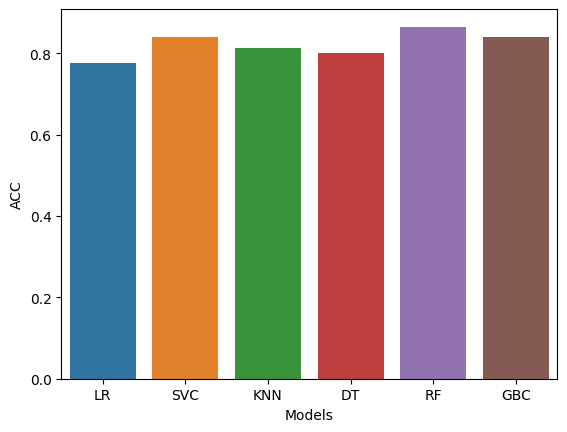

In [172]:
sns.barplot(data=final_data,x="Models",y="ACC")

### 14. Saving the Best Model

In [173]:
X_res = sc.fit_transform(X_res)

In [174]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [175]:
import joblib

In [176]:
joblib.dump(rf,'churn_prediction_model')

['churn_prediction_model']

In [177]:
model = joblib.load('churn_prediction_model')

In [178]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [179]:
model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]])

array([1], dtype=int64)

OUTPUT: Customer will leave the bank.

From the review of the fitted models above, the best model that gives a decent balance of the recall and precision is the random forest where according to the fit on the training set, with a precision score  of 0.86, out of all customers that the model thinks will churn, 86% do actually churn and with the recall score of 0.86.